In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

df = pd.read_csv('/home/bike_sales_100k.csv')
df.head(2)

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male


In [2]:
age_median = df['Customer_Age'].median()
age_median = 20
df['Customer_Age'] = df.apply(lambda row: 1 if row['Customer_Age'] > age_median else 0, axis=1)
df['Customer_Age'].value_counts()

,count
Customer_Age,
1,94343
0,5657


In [ ]:
del df['Sale_ID']
del df['Date']
del df['Customer_ID']
del df['Salesperson_ID']


In [ ]:
df['Bike_Model'].value_counts()

,count
Bike_Model,
BMX,14377
Road Bike,14363
Cruiser,14332
Folding Bike,14329
Hybrid Bike,14319
Electric Bike,14169
Mountain Bike,14111


In [ ]:
df['BMX'] = df.apply(lambda row: 1 if row['Bike_Model'] == 'BMX' else 0, axis=1)
df['Road Bike'] = df.apply(lambda row: 1 if row['Bike_Model'] == 'Road Bike' else 0, axis=1)
df['Cruiser'] = df.apply(lambda row: 1 if row['Bike_Model'] == 'Cruiser' else 0, axis=1)
df['Folding Bike'] = df.apply(lambda row: 1 if row['Bike_Model'] == 'Folding Bike' else 0, axis=1)
df['Hybrid Bike'] = df.apply(lambda row: 1 if row['Bike_Model'] == 'Hybrid Bike' else 0, axis=1)
df['Electric Bike'] = df.apply(lambda row: 1 if row['Bike_Model'] == 'Electric Bike' else 0, axis=1)
df['Mountain Bike'] = df.apply(lambda row: 1 if row['Bike_Model'] == 'Mountain Bike' else 0, axis=1)
del df['Bike_Model']

In [ ]:
print(df['BMX'].value_counts())
print(df['Road Bike'].value_counts())
print(df['Cruiser'].value_counts())
print(df['Folding Bike'].value_counts())
print(df['Hybrid Bike'].value_counts())
print(df['Electric Bike'].value_counts())
print(df['Mountain Bike'].value_counts())
print(df['Store_Location'].value_counts())

BMX
0    85623
1    14377
Name: count, dtype: int64
Road Bike
0    85637
1    14363
Name: count, dtype: int64
Cruiser
0    85668
1    14332
Name: count, dtype: int64
Folding Bike
0    85671
1    14329
Name: count, dtype: int64
Hybrid Bike
0    85681
1    14319
Name: count, dtype: int64
Electric Bike
0    85831
1    14169
Name: count, dtype: int64
Mountain Bike
0    85889
1    14111
Name: count, dtype: int64
Store_Location
New York        14515
Phoenix         14385
Philadelphia    14330
San Antonio     14300
Chicago         14207
Houston         14149
Los Angeles     14114
Name: count, dtype: int64


In [ ]:
df['New York'] = df.apply(lambda row: 1 if row['Store_Location'] == 'New York' else 0, axis=1)
df['Phoenix'] = df.apply(lambda row: 1 if row['Store_Location'] == 'Phoenix' else 0, axis=1)
df['Philadelphia'] = df.apply(lambda row: 1 if row['Store_Location'] == 'Philadelphia' else 0, axis=1)
df['San Antonio'] = df.apply(lambda row: 1 if row['Store_Location'] == 'San Antonio' else 0, axis=1)
df['Chicago'] = df.apply(lambda row: 1 if row['Store_Location'] == 'Chicago' else 0, axis=1)
df['Houston'] = df.apply(lambda row: 1 if row['Store_Location'] == 'Houston' else 0, axis=1)
df['Los Angeles'] = df.apply(lambda row: 1 if row['Store_Location'] == 'Los Angeles' else 0, axis=1)
del df['Store_Location']

In [ ]:
print(df['New York'].value_counts())
print(df['Phoenix'].value_counts())
print(df['Philadelphia'].value_counts())
print(df['San Antonio'].value_counts())
print(df['Chicago'].value_counts())
print(df['Houston'].value_counts())
print(df['Los Angeles'].value_counts())
print(df['Payment_Method'].value_counts())


New York
0    85485
1    14515
Name: count, dtype: int64
Phoenix
0    85615
1    14385
Name: count, dtype: int64
Philadelphia
0    85670
1    14330
Name: count, dtype: int64
San Antonio
0    85700
1    14300
Name: count, dtype: int64
Chicago
0    85793
1    14207
Name: count, dtype: int64
Houston
0    85851
1    14149
Name: count, dtype: int64
Los Angeles
0    85886
1    14114
Name: count, dtype: int64
Payment_Method
Apple Pay      16751
Debit Card     16738
Cash           16692
Credit Card    16653
Google Pay     16613
PayPal         16553
Name: count, dtype: int64


In [ ]:
df['Apple Pay'] = df.apply(lambda row: 1 if row['Payment_Method'] == 'Apple Pay' else 0, axis=1)
df['Debit Card'] = df.apply(lambda row: 1 if row['Payment_Method'] == 'Debit Card' else 0, axis=1)
df['Cash'] = df.apply(lambda row: 1 if row['Payment_Method'] == 'Cash' else 0, axis=1)
df['Credit Car'] = df.apply(lambda row: 1 if row['Payment_Method'] == 'Credit Car' else 0, axis=1)
df['Google Pay'] = df.apply(lambda row: 1 if row['Payment_Method'] == 'Google Pay' else 0, axis=1)
df['PayPal'] = df.apply(lambda row: 1 if row['Payment_Method'] == 'PayPal' else 0, axis=1)
del df['Payment_Method']


In [ ]:
df['Customer_Gender'] = df.apply(lambda row: 1 if row['Customer_Gender'] == 'Female' else 0, axis=1)
df.head(2)

,Price,Quantity,Customer_Age,Customer_Gender,BMX,Road Bike,Cruiser,Folding Bike,Hybrid Bike,Electric Bike,...,San Antonio,Chicago,Houston,Los Angeles,Apple Pay,Debit Card,Cash,Credit Car,Google Pay,PayPal
0,318.32,1,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3093.47,4,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
x = df.drop('Customer_Age', axis='columns')
y = df['Customer_Age']
x_scaled = preprocessing.StandardScaler().fit(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
d = {'lbfgs':0, 'liblinear':0, 'newton-cg':0,  'newton-cholesky':0, 'sag':0, 'saga':0}

for k in d.keys():
  classifier = LogisticRegression(max_iter=100, solver=k)
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x)
  print(f"Accuracy {k}:", accuracy_score(y, y_pred))
  d[k] = accuracy_score(y, y_pred)

classifier = LogisticRegression(max_iter=100000, solver=max(d, key=d.get))
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x)
print(f"Chosen one ",max(d, key=d.get) ,":", accuracy_score(y, y_pred))
d[k] = accuracy_score(y, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy lbfgs: 0.94343
Accuracy liblinear: 0.94343
Accuracy newton-cg: 0.94343
Accuracy newton-cholesky: 0.94343


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy sag: 0.94343


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy saga: 0.94343
Chosen one  lbfgs : 0.94343


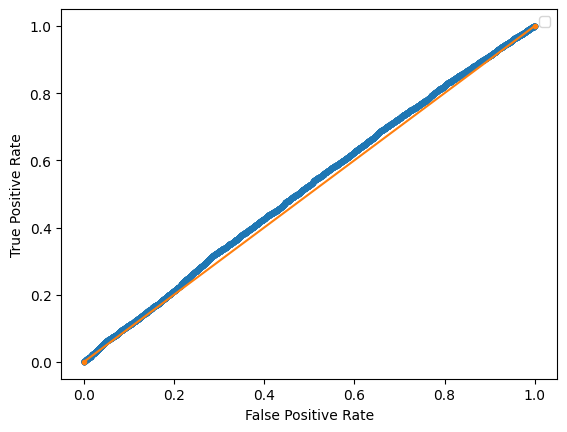

In [ ]:
from sklearn.metrics import roc_curve

# predict probabilities
y_proba = classifier.predict_proba(x)

y_proba_1 = y_proba[:, 1]
n_prob = [0 for _ in range(len(y))]

# calculate roc curves
f_pr_1, t_pr_1, _ = roc_curve(y, y_proba_1)
n_fpr, n_tpr, _ = roc_curve(y, n_prob)

# plot the roc curve for the model
plt.plot(f_pr_1, t_pr_1, marker='.')
plt.plot(n_fpr, n_tpr, marker='.')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

<Axes: >

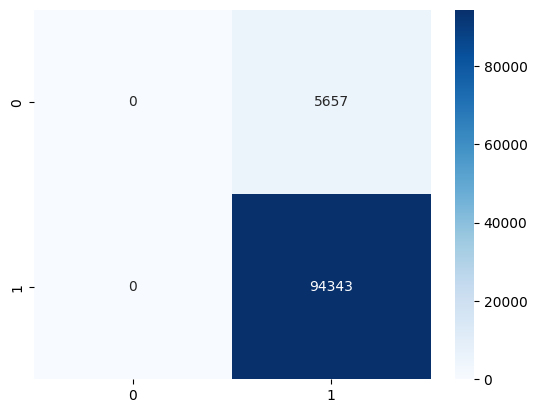

In [ ]:
y_pred = classifier.predict(x)
matrix = confusion_matrix(y, y_pred)
# sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Reds')
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")
# matrix


In [ ]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5657
           1       0.94      1.00      0.97     94343

    accuracy                           0.94    100000
   macro avg       0.47      0.50      0.49    100000
weighted avg       0.89      0.94      0.92    100000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
